In [1]:
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec


import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from collections import namedtuple
from shapely import geometry

import scipy 
from scipy import stats, optimize, interpolate

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 372.19.1.el8_6.x86_64 x86_64 with glibc2.17
numpy 1.20.3
matplotlib 3.4.2
xarray 0.19.0
cartopy 0.18.0
scipy 1.7.1
Mon Aug 29 12:20:43 2022 CEST

In [3]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/'

In [4]:
ds_nT_Dec_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')


In [5]:
ds_nT_Mar_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')


In [6]:
ds_nT_Jun_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')

ds_nT_Jul_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')


In [7]:
ds_nT_Sep_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')


In [8]:
def rem_nans(ds):
    """
    This renders lon and lat variables without nans for the last timestep.
    """
    bad_indices = np.isnan(ds['lon'][:,-1]) | np.isnan(ds['lat'][:,-1])
    good_indices = ~bad_indices
    lon_end_nonans = ds['lon'][:,-1][good_indices]
    lat_end_nonans = ds['lat'][:,-1][good_indices]
    
    return lon_end_nonans, lat_end_nonans

In [9]:
ntitles = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] # order by OGCM months


In [10]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [11]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

# Deleted particles

In [12]:

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=.5)


# Subregion selected:

In [13]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)#lomin -35 #lomax -18 # lamin 30 # lamax 40

In [14]:
geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)

# Subregion histogram 2D 0.1 degree bins:

In [15]:
nbins = (60, 40)

xmin = subregion.lonmin
xmax = subregion.lonmax
ymin = subregion.latmin
ymax = subregion.latmax

vmin=0.
vmax=30.

# Histogram 1D

In [16]:
ymax_1d = .2
xmax_1d = 90

nbins_1d = 20

In [17]:
def plot_hist1d_particles_b(dsp, axn, nbins_1d, ntitle, labelf, ncolor='b'):
    """
    """    
    ######
    # Title
    if ntitle in ntitles[0:6]:
        nyear = '2009'
    elif ntitle in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitle + ' ' + nyear
    axn.set_title(strtitle, size=16)
    ######
    
    lon_end_nonans, lat_end_nonans = rem_nans(dsp)
    counts, xedges, yedges = np.histogram2d(lon_end_nonans, lat_end_nonans, bins=nbins, range=((xmin, xmax), (ymin, ymax)))

    axn.hist(counts.ravel(), bins=nbins_1d, density=True, color=ncolor, alpha=.5, label=labelf)
    axn.set_ylim([0, ymax_1d])
    axn.set_xlim([0, xmax_1d])
    axn.grid()
    axn.axvline(x=counts.ravel().max(), color=ncolor)
    #print(counts.ravel().max())
    skw_2D = scipy.stats.skew(counts.ravel())
    #     axn.annotate('Skewness = ' + str(np.round(scipy.stats.skew(counts.ravel()), 2)),
    #                 xy=(22, .17), xycoords='data', size=16)
    return skw_2D, counts.ravel()
    

In [18]:
#https://matplotlib.org/3.3.4/gallery/recipes/placing_text_boxes.html

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=1) #  alpha=


# Defining same binsize for all months instead of bin number

In [19]:
ymax_1d = .15

bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# specify bin start and end points

In [20]:
ymax_1d = .15

bins_list = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90]
# specify bin start and end points

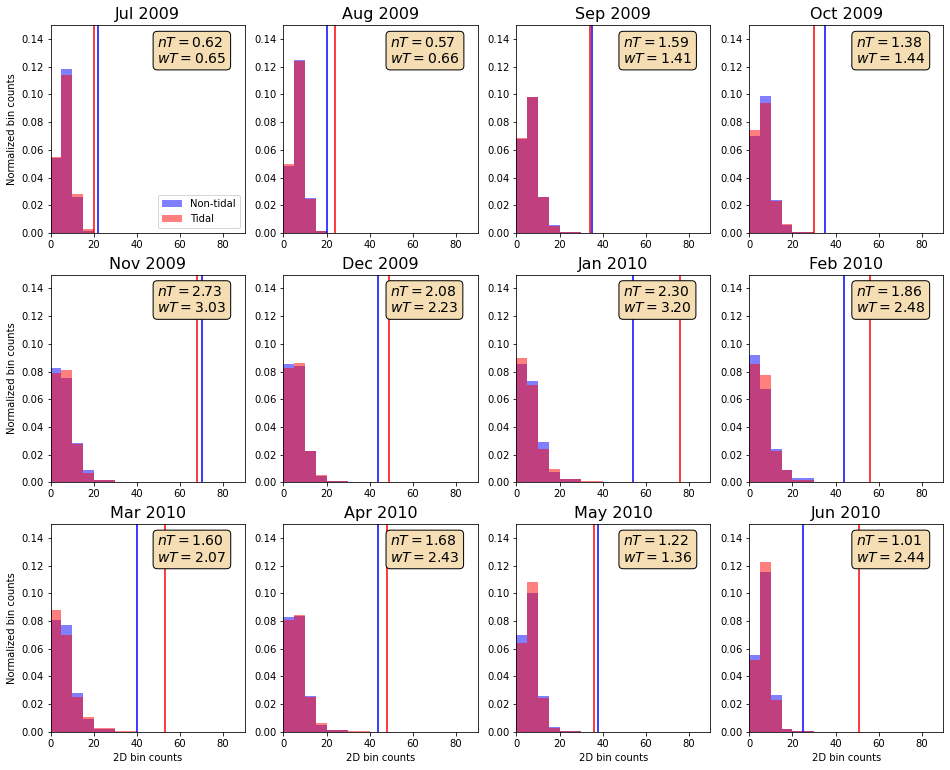

In [21]:
fig = plt.figure(figsize=(16,13)) #(17,5)

#cbar_ticks = [0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009] 

gs = gridspec.GridSpec(3, 4)#, width_ratios=[.33, .33, .33]) #, .01])
#axC = plt.subplot(gs[:, -1])

counts_nT = np.ones((12, 60*40)) * np.nan
counts_wT = np.ones((12, 60*40)) * np.nan

for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs[ii])
    skw_2D_nT, counts_nT[ii,:] = plot_hist1d_particles_b(dsps_nT[ii], ax1, bins_list, ntitles[ii], labelf='Non-tidal', ncolor='b')
    skw_2D_wT, counts_wT[ii,:] = plot_hist1d_particles_b(dsps_wT[ii], ax1, bins_list, ntitles[ii], labelf='Tidal', ncolor='r')
    if ii == 0:
        ax1.legend(loc='lower right')
    if ((ii==0) | (ii==4) | (ii ==8)):
        ax1.set_ylabel('Normalized bin counts')
    if ((ii ==8) | (ii==9) | (ii==10) | (ii==11)):
        ax1.set_xlabel('2D bin counts')
    textstr = '\n'.join((
    r'$nT=%.2f$' % (skw_2D_nT, ),
    r'$wT=%.2f$' % (skw_2D_wT, )))
        
    # place a text box in upper left in axes coords
    ax1.text(0.55, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

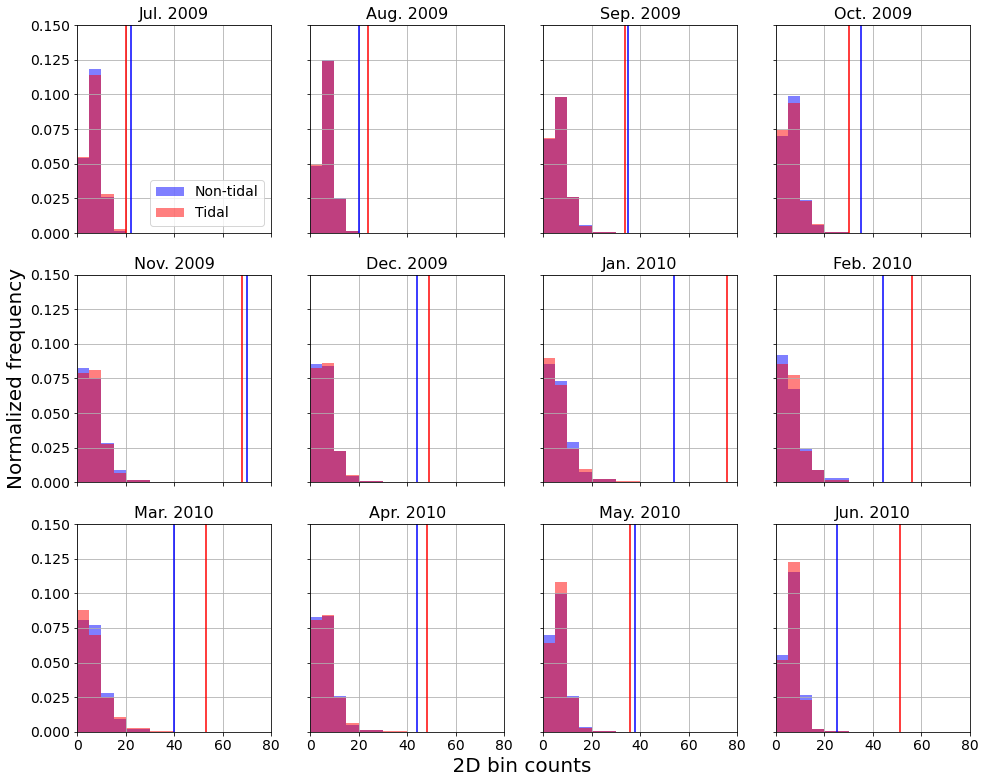

In [22]:
xmax_1d = 80

fig = plt.figure(figsize=(16,13)) #(17,5)

#cbar_ticks = [0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009] 

gs = gridspec.GridSpec(3, 4)#, width_ratios=[.33, .33, .33]) #, .01])
#axC = plt.subplot(gs[:, -1])


for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs[ii])
    
    ntitle = ntitles[ii]
    ######
    # Title
    if ntitle in ntitles[0:6]:
        nyear = '2009'
    elif ntitle in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitle + '. ' + nyear
    ax1.set_title(strtitle, size=16)
    ######
    
    ax1.hist(counts_nT[ii,:], bins=bins_list, density=True, alpha=.5, label='Non-tidal', color='b')
    ax1.set_ylim([0, ymax_1d])
    ax1.set_xlim([0, xmax_1d])
    ax1.axvline(x=counts_nT[ii,:].max(), color='b')
    
    ax1.hist(counts_wT[ii,:], bins=bins_list, density=True, alpha=.5, label='Tidal', color='r')
    ax1.set_ylim([0, ymax_1d])
    ax1.set_xlim([0, xmax_1d])
    ax1.axvline(x=counts_wT[ii,:].max(), color='r')
    
    #skw_2D_wT, _ = plot_hist1d_particles_b(dsps_wT[ii], ax1, bins_list, ntitles[ii], labelf='Tidal', ncolor='r')
    ax1.grid()
    ax1.tick_params(axis='both', which='major', labelsize=14)

    if ii == 0:
        ax1.legend(loc='lower right', fontsize=14)
    if ((ii==4)):
        ax1.set_ylabel('Normalized frequency', size=20) # Normalized bin counts
    if ((ii==9)):
        ax1.set_xlabel('                                    2D bin counts', size=20)
    if ii<8 :
        ax1.axes.xaxis.set_ticklabels([])
    if (ii != 0) & (ii != 4) & (ii != 8) :
        ax1.axes.yaxis.set_ticklabels([])
#     textstr = '\n'.join((
#     r'$nT=%.2f$' % (skw_2D_nT, ),
#     r'$wT=%.2f$' % (skw_2D_wT, )))
#     # place a text box in upper left in axes coords
#     ax1.text(0.55, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

plt.savefig('figs/' + 'hist1d_nT_wT_monthly_nobox.png', dpi=300)
  
plt.show()
